In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from numpy.random import randint

### Dataset link: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection?select=true.csv

In [18]:
fake = pd.read_csv('news/fake.csv')
real = pd.read_csv('news/true.csv')

In [19]:
fake['label']=0
real['label']=1

In [20]:
df=pd.concat([fake, real], axis=0)
df.shape

(44898, 5)

In [21]:
#to shuffle the dataset=sample and to shuffle entire dataset, frac=1 if only 80% then 0.8. to make sure it shuffles the same way everytime 
# give random_state. to give updated index reset_index and drop prev ones drop = True
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
df.shape

(44898, 5)

In [22]:
df.to_csv('news/combined.csv',index=False)

In [23]:
df.head(20)

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",0
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",0
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",0
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",1
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",1


### Data preprocessing for title and text columns
    1. check for null values and remove them or fill them
    2. remove special characters; convert to lowercase

In [24]:
#isna() and isnull()(alias of isna()) is same; use isna()
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [25]:
import re
def clean(text):
    text=text.lower()
    text=re.sub(r'[^a-z0-9\s]',' ',text) # remove special characters
    text=re.sub(r'\s+',' ',text).strip() # remove extra spaces
    return text 

In [26]:
df['clean_text']=df['text'].apply(clean)

In [35]:
x=df[['clean_text']]
y=df['label']

In [29]:
x_train,x_test, y_train, y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918, 1)
(8980, 1)
(35918,)
(8980,)


### Converting text and title to numerical data using TFID VECTORIZER

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_tf = vectorizer_text.fit_transform(x_train['clean_text'])
x_test_tf = vectorizer_text.transform(x_test['clean_text'])

In [40]:
print(x_train_tf.shape,x_test_tf.shape, sep=' ')

(35918, 5000) (8980, 5000)


### Decision Tree Classifier

In [41]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train_tf, y_train)
y_pred_dt= dtree.predict(x_test_tf)

Accuracy score:  0.994988864142539  
 Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       1.00      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



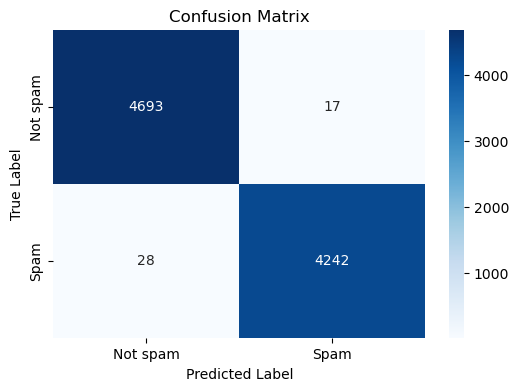

In [43]:
accuracy=accuracy_score(y_test, y_pred_dt)
classification = classification_report(y_test, y_pred_dt)
print('Accuracy score: ',accuracy,' \n Classification report: ',classification)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", xticklabels=["Not spam", "Spam"], yticklabels=["Not spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Logistic Regression

In [44]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_tf, y_train)

LogisticRegression(random_state=42)

In [47]:
y_pred_lr = lr.predict(x_test_tf)
print('Accuracy score:',accuracy_score(y_test, y_pred_lr))
print('Classification Report:',classification_report(y_test,y_pred_lr))

Accuracy score: 0.9847438752783965
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



### Random Forest

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train_tf, y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = rf.predict(x_test_tf)
print('Accuracy score:',accuracy_score(y_test, y_pred_rf))
print('Classification Report:',classification_report(y_test,y_pred_rf))

Accuracy score: 0.9966592427616926
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### Multinomial NB

In [50]:
mn = MultinomialNB()
mn.fit(x_train_tf, y_train)

MultinomialNB()

In [52]:
y_pred_mn = mn.predict(x_test_tf)
print('Accuracy score:',accuracy_score(y_test, y_pred_mn))
print('Classification Report:',classification_report(y_test,y_pred_mn))

Accuracy score: 0.9263919821826281
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4710
           1       0.92      0.92      0.92      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



### KNeighbors classifier

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train_tf, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn=knn.predict(x_test_tf)
print('Accuracy score:',accuracy_score(y_test, y_pred_knn))
print('Classification Report:',classification_report(y_test,y_pred_knn))

Accuracy score: 0.7092427616926503
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.97      0.78      4710
           1       0.92      0.43      0.58      4270

    accuracy                           0.71      8980
   macro avg       0.78      0.70      0.68      8980
weighted avg       0.78      0.71      0.68      8980



### Now the best performing model is Random Forest with 99% accuracy. Let's tune its hyperparameter using randomized search cv

In [ ]:
param = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None,10,20,30,40],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['sqrt','log2',None],
    'bootstrap':[True,False],
}

ran = RandomizedSearchCV(rf, param_distributions=param,n_iter=25,cv=3,random_state=42,verbose=2,n_jobs=2)
ran.fit(x_train_tf,y_train)

print(ran.best_params_)

y_pred=ran.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
